构造数据集

In [21]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dataset = pd.DataFrame(
    {
        'Age': ['<=30', '<=30', '[31,40]', '>40', '>40', '>40', '[31,40]', '<=30', '<=30', '>40', '<=30', '[31,40]', '[31,40]'], 
        'Incoming': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high'], 
        'Student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes','no', 'yes', 'yes', 'yes', 'no', 'yes'],
        'Credit Rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair'], 
        'Buying': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes']
    }
)
dataset

,Age,Incoming,Student,Credit Rating,Buying
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,"[31,40]",high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,"[31,40]",low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [22]:
#数值化处理
dataset=dataset.replace({'Age':{'<=30':0,'[31,40]':1,'>40':2}})
dataset=dataset.replace({'Incoming':{'low':0,'medium':1,'high':2}})
dataset=dataset.replace({'Student':{'no':0,'yes':1}})
dataset=dataset.replace({'Credit Rating':{'fair':0,'excellent':1}})
dataset=dataset.replace({'Buying':{'no':0,'yes':1}})
dataset

,Age,Incoming,Student,Credit Rating,Buying
0,0,2,0,0,0
1,0,2,0,1,0
2,1,2,0,0,1
3,2,1,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,1,0,1,1,1
7,0,1,0,0,0
8,0,0,1,0,1
9,2,1,1,0,1


In [23]:
X = dataset[['Age', 'Incoming', 'Student', 'Credit Rating']]
y = dataset[['Buying']]

训练模型

In [24]:
model=DecisionTreeClassifier(criterion='gini')
model.fit(X,y)

DecisionTreeClassifier()

可视化决策树

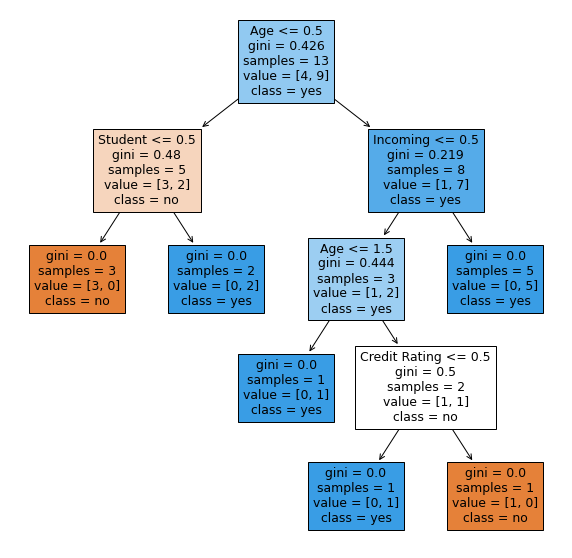

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
tree_fig = tree.plot_tree(model, feature_names=['Age', 'Incoming', 'Student', 'Credit Rating'],  class_names=['no', 'yes'], filled=True)

预测

In [29]:
res=model.predict([[2, 1, 0, 1]])
res

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)